#Titanic Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df = sns.load_dataset('titanic')

In [3]:
df.head()
#sibsp-> siblings or spouse was present or not
#parch-> parents or children was present or not
#sib/spouse->not much dependent (similar age), par/ch->dependent so they are together
#embarked->where they got in

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()
#age has null values
#class has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


([<matplotlib.axis.XTick at 0x7a1627610200>,
 [Text(0, 0, 'Died'), Text(1, 0, 'Survived')])

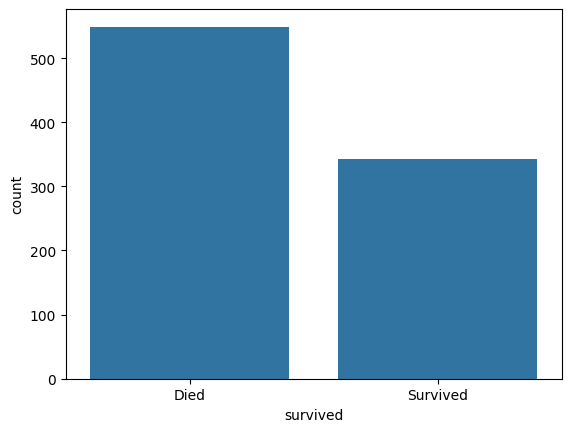

In [24]:
#Univariate Analysis
#Q. How many survived vs how many died
sns.countplot(x='survived', data=df)
plt.xticks([0,1], ['Died', 'Survived'])
#more people died compared to survived

<Axes: xlabel='age', ylabel='Count'>

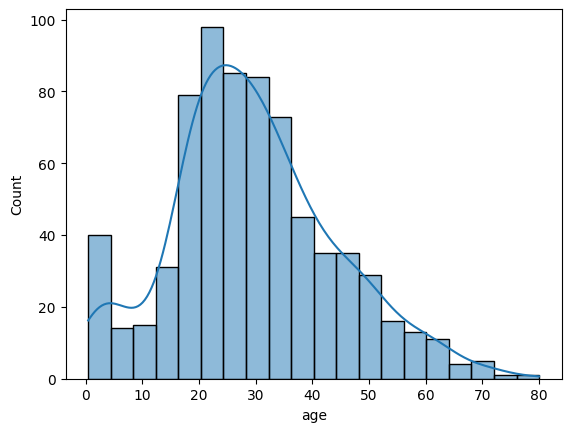

In [26]:
#Age distribution
sns.histplot(df['age'].dropna(), kde=True)

<Axes: xlabel='fare', ylabel='Count'>

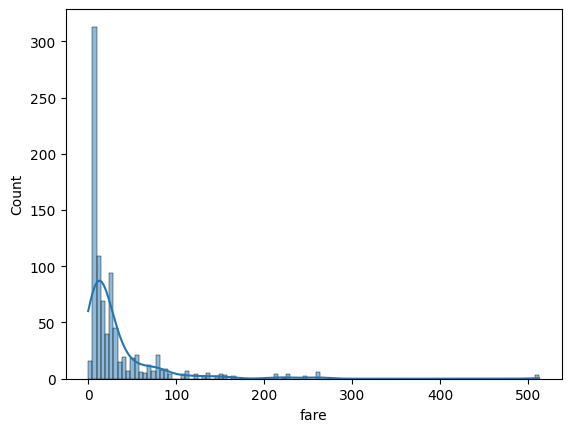

In [27]:
#Fare Distribution
sns.histplot(df['fare'].dropna(), kde=True)

<Axes: xlabel='fare'>

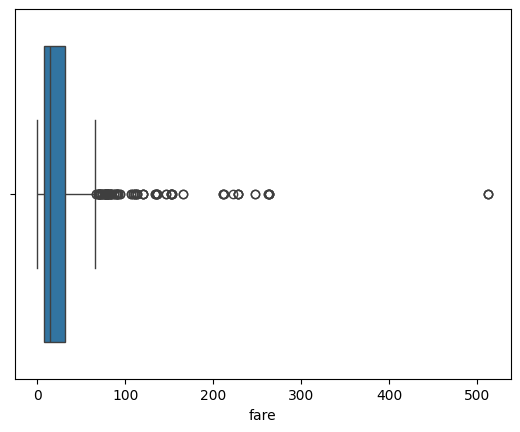

In [28]:
#Fare Distribution
sns.boxplot(x=df['fare'])

In [29]:
# Observation:
# Age: Roughly bell-shaped, peaking around 20-30 years old. Note the small bump near 0-5 (infants).
# Fare: Highly Right-Skewed. Most tickets were cheap, but a few were incredibly expensive (Outliers).

#Bivariate Analysis

<Axes: xlabel='sex', ylabel='survived'>

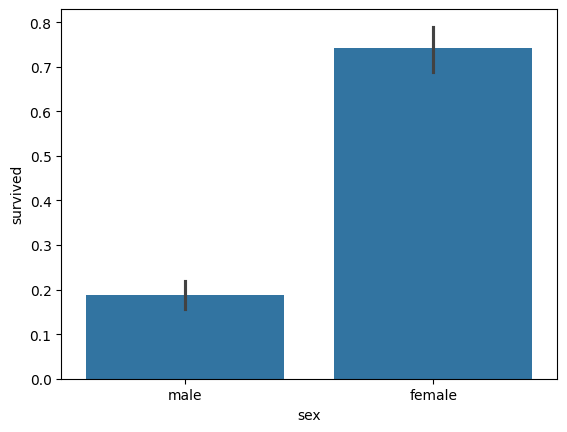

In [31]:
# Hypothesis: Did gender matter?
# Which gender survived more?
sns.barplot(x='sex', y='survived', data=df)

<Axes: xlabel='pclass', ylabel='survived'>

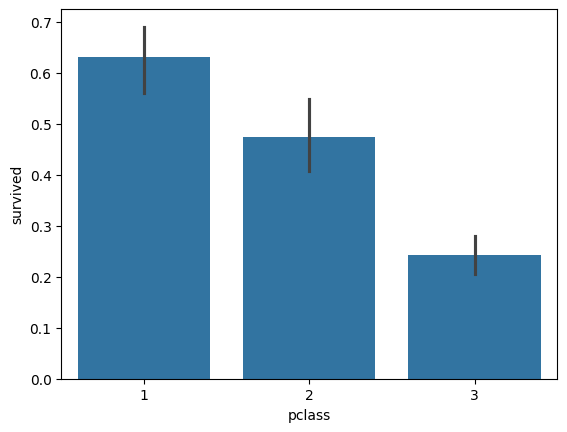

In [32]:
#Hypothesis: Rich people survived more 1st class compared to 3rd
sns.barplot(x='pclass', y='survived', data=df)

<Axes: xlabel='age', ylabel='survived'>

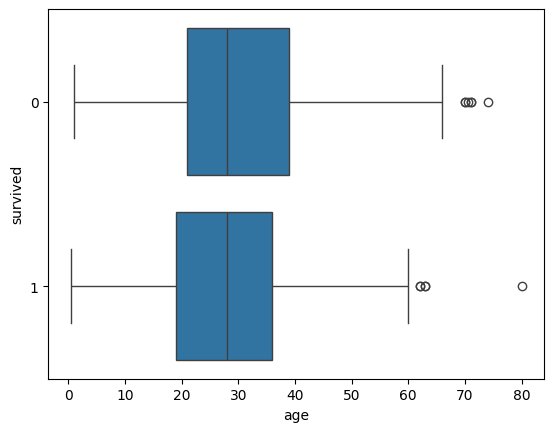

In [33]:
sns.boxplot(x=df['age'], y=df['survived'].astype(str))

In [34]:
# Feature Engineering
df['family_size']=df['sibsp'] + df['parch']+1

In [35]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,4
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


<Axes: xlabel='family_size', ylabel='survived'>

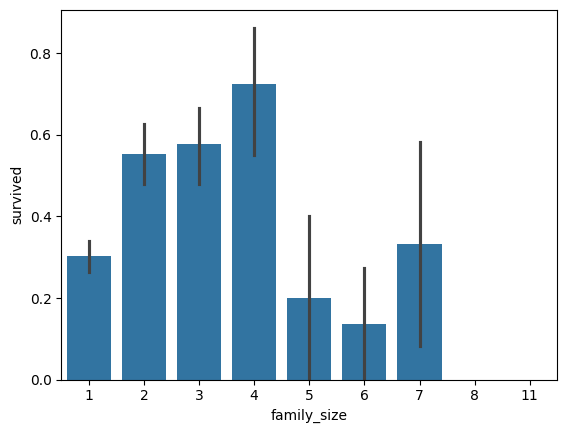

In [37]:
sns.barplot(x='family_size', y='survived', data=df)